# Kickoff project 2 - 20 oktober 2022

**Groep 0: Jan, Marc, en Kevin -->**

Donderdag 20 oktober

Vandaag hebben we de projectomschrijving doorgenomen, en afgesproken dat we voor de vakantie alledrie het eerste artikel lezen en een start maken met het CNN bouwen.

De rest van de dag hebben we ingericht om individueel de projectopdracht te bekijken/bestuderen en eventueel wat openstaande notebooks af te maken

Vrijdag 21 oktober

vandaag begonnen met het lezen van het artikel "Classification of Apple Disease Based on Non-Linear Deep Features" van Ayaz et. al
Dit onderzoek ligt heel dicht bij de opdracht zoals wij die in het project hebben gekregen, en ik heb hier relevante info uit kunnen halen, zoals:
     
- Er worden twee DCNN modellen gebruikt, de eerste als generator, de tweede als discriminator
- In het generator model maken de onderzoekers gebruik van Tanh in de output layer
- Het 'eigen' model scoort hier beter dan de pre-trained modellen
- ResNet50 komt naar voren als het meest effectieve pre-trained model waarmee het eigen model vergeleken is (96% Overall Accuracy)
- ADAM komt in alle gevallen naar voren als de meest effectieve optimizer met de hoogste overall accuracy.
- Bij het trainen van het model worden slechts 30 epochs gebruikt, bij het 'gebruik' van het model slechts 8 epochs.

Met deze conclusies ben ik begonnen met het bouwen van het eerste model. Gezien de uitkomsten in het onderzoek van Ayaz et al ben ik uitgegaan van hetzelfde aantal
layers (conv2d, maxpooling, dropout & dense), alleen het aantal inputpixels heb ik verlaagd naar 224x224, omdat vele trainafbeeldingen een lage resolutie hebben.
Tevens hebben we besloten om padding buiten beschouwing te laten in dit model, omdat ik niet verwacht dat de doorslaggevende features die mijn model eruit zal halen, aan de rand van de foto zitten.

In de middag hebben we wederom met zn drieën gezeten en onze bevindingen besproken. We kwamen tot de conclusie dat we een redelijk beeld hebben van het project. **Ook afgesproken wat taken te gaan splitsen zodat we elkaar kunnen versterken** en een redelijk beeld hebben van het tempo wat we willen behalen zodra we na de vakantie aan de slag gaan.

Voordat we met NLP en ChatOps aan de slag gaan (week 46) willen we het gedeelte daarvoor klaar hebben zodat we ons dan ook op NLP en ChatOps kunnen richten.

maandag 31 oktober 

Vandaag zijn we bezig geweest met het vraagstuk: hoe laden we onze data in. Hiervoor zijn we gaan zoeken in de documentaties van Tensorflow en Keras, 
hebben we wat verschillende zaken uitgeprobeerd, en gaf Frank ons uiteindelijk de verlossende tip om gebruik te maken van de keras functie:  tf.keras.utils.image_dataset_from_directory.

Na het succesvol inladen van de data zijn we begonnen met de eerste trainingssessies. Al snel kwamen we tot de conclusie dat we snel meer (geaugmenteerde) data nodig hebben, omdat met een kleine dataset als deze het gevaar van overfitting op de loer ligt. We hebben op verschillende manieren geprobeerd de dataset uit te bereiden. Marc heeft bijvoorbeeld een dataset uitgebreid naar zo'n 1200 afbeeldingen. Dit was trouwens zijn kennismaking met augmentation!

Dinsdag 1 november

KATA doel voor morgen: augmentatie toepassen op de apple images en door het model heen halen.

Verder op deze dinsdag geexperimenteerd met het model, met en zonder keras augmentatielagen en ik heb bekeken welke designkeuzes ik wil maken rondom augmentatie.


Woensdag 2 november

KATA doel voor morgen: augmentatiestuk afronden, start maken met confusion matrix
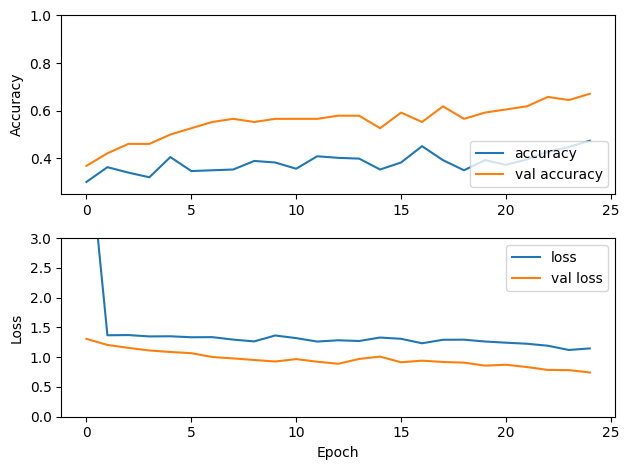

Donderdag 3 november

Geaugmenteerde data toegevoegd door bestaande afbeeldingen te flippen, te croppen, en toe te voegen aan de dataset. Daarbij gelet op een redelijk evenredige verdeling van aantallen geaugmenteerde afbeeldingen per klasse, zodat het model op alle klassen dezelfde gelegenheid krijgt om de juiste features voor die klasse eruit te halen:
    Found 2665 files belonging to 4 classes.
Using 2132 files for training.
Found 2665 files belonging to 4 classes.
Using 533 files for validation.

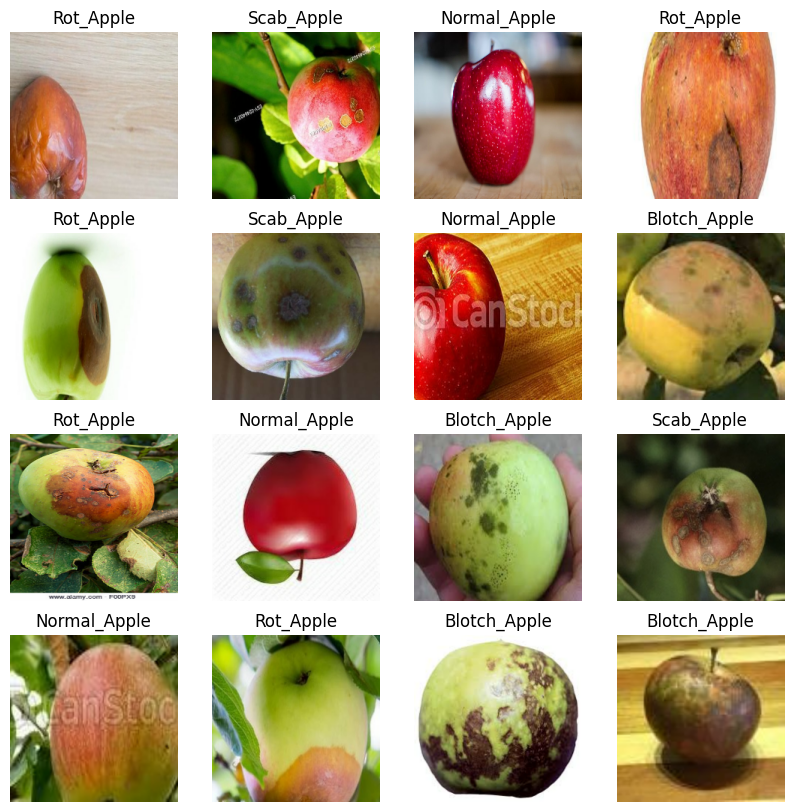

<!-- Vrijdag 4 november
Besloten om vandaag iets anders te gaan doen dan mijn groepsgenoten, die zich op een batchgenerator en aql tool gaan richten. Ik ga me vandaag eerst richten op het vergelijken
van mijn eigen model met een pretrained model (MobileNetV2).  -->

Maandag 7 november

Vandaag CNN model opnieuw getraind, max score met Leaky Relu en tanh:
    Epoch 35/35
68/68 - 281s - loss: 0.5925 - accuracy: 0.8521 - val_loss: 0.7041 - val_accuracy: 0.7611 - 281s/epoch - 4s/step

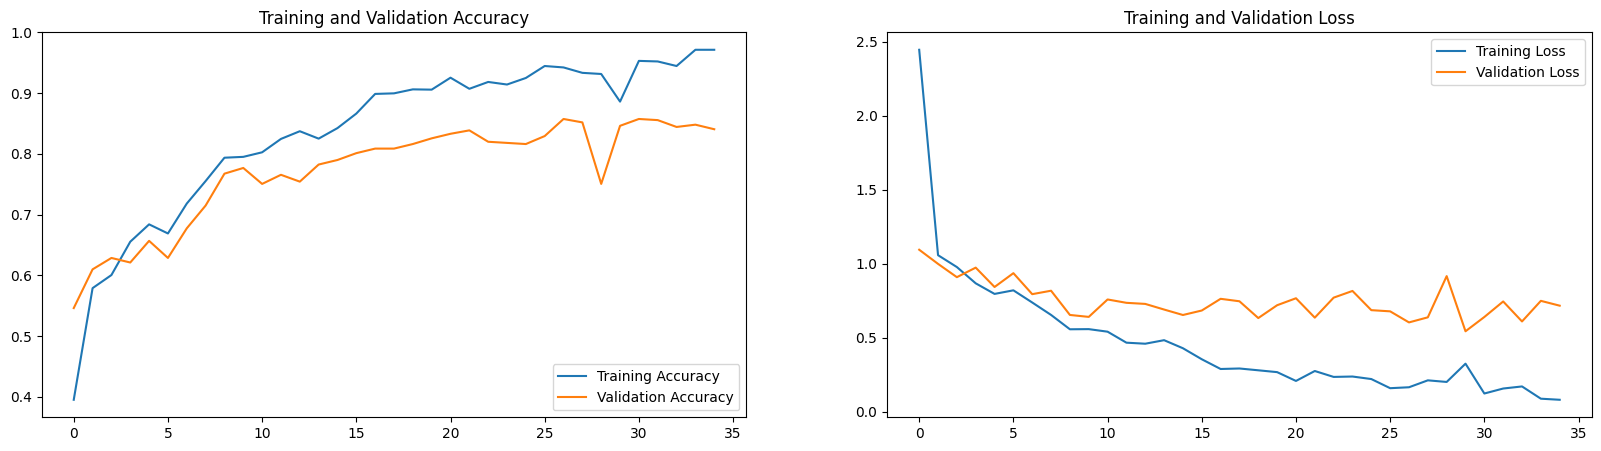


Transfer learning MobileNetV2 opnieuw getraind, max score:
    Epoch 35/35
68/68 [==============================] - 62s 913ms/step - loss: 0.0165 - accuracy: 0.9958 - val_loss: 0.2202 - val_accuracy: 0.9444. Deze maar opgeslagen.
Goede resultaten op de testset blijven echter uit, dit model haalt uit de 120 appels er maar 27 op een correcte manier uit. Dit komt niet overeen met mijn Test Accuracy. Snap er niets van:

# gewoon gokken geeft dus hetzelfde resultaat..............

Confusion Matrix 7 november MobileNetV2 Model:
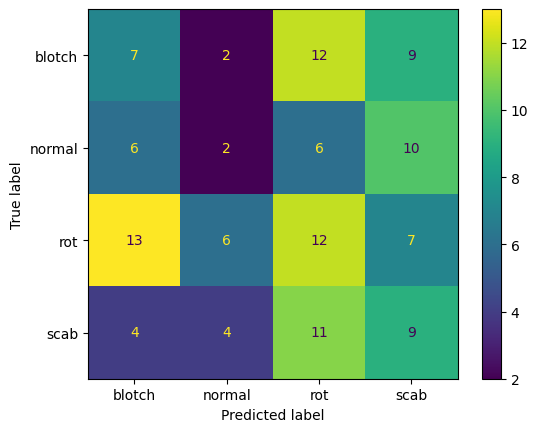

Dinsdag 8 november

Vanwege het verschil tussen de training/validation accuracy met de test accuracy. Van Kevin begrepen dat het met RESNET niet beter gaat. Daar gaan we dus niet aan beginnen.
bij het MobileNetV2 model. Eenmaal getraind op 35 epochs (10 finetuning) zonder preprocessing van de input.
Deze geeft echter ook geen denderend goed resultaat, met een maximale accuracy van rond de 55% (zie plot)
Preprocessing functie uiteindelijk wel kunnen toevoegen en opnieuw getraind tot 56% accuracy:
Epoch 35/35
68/68 [==============================] - 293s 4s/step - loss: 1.0115 - accuracy: 0.5659 - val_loss: 1.0029 - val_accuracy: 0.5611

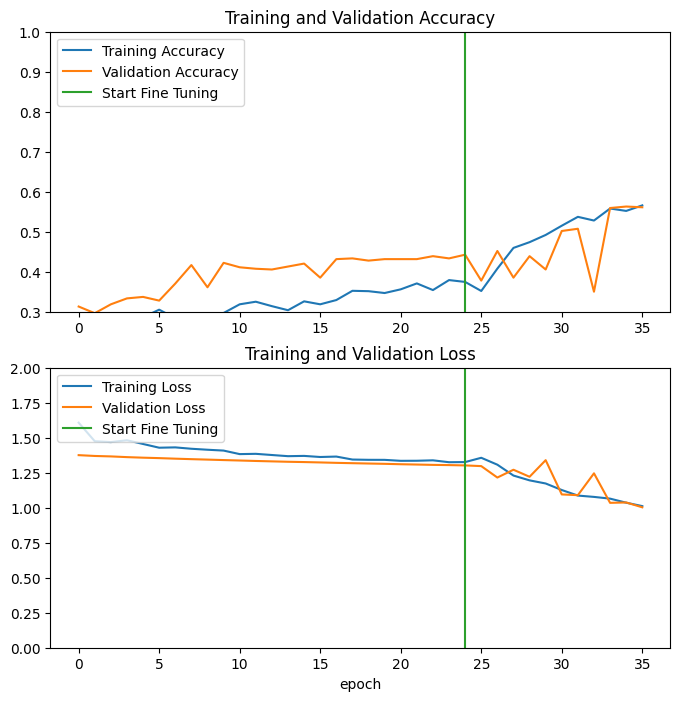

De AQL module van Marc bekeken en hem bevraagd over hoe hij het aangepakt heeft. Marc heeft echter jarenlange programmeer ervaring en het programmeren an sich al goed onder de knie, dus de wijze waarop hij een AQL tool heeft gebouwd gaat in meerdere opzichten mijn pet te boven. Kevin en ik hebben besloten hier geen gebruik van te maken. **Te moeilijk.**

Tevens gekeken naar kleine verbeteringen van mijn eigen model, dmv verschillende activaties toepassen op de layers en een extra dropoutlaag toegevoegd.
Erachter gekomen dat een sparse categorical crossentropy niet alleen met softmax niet werkt (omdat de loss functie met logits werkt), maar ook niet met sigmoid (welke lijkt op softmax maar waarden tussen -1 en 1 geeft)

Woensdag 9 november

Eigen model hertraind met extra dropout layer en tanh output. Na overleg met Anton erachter gekomen dat ik bij het inladen v testdata (shuffle=False) moest toevoegen aan mn testdirectory.
Om deze reden deed mijn confusionmatrix bij alle drie de modellen niet wat ik wilde.
Epoch 35/35
68/68 [==============================] - 188s 3s/step - loss: 0.6172 - accuracy: 0.8442 - val_loss: 0.6984 - val_accuracy: 0.7759
Test accuracy eigen model: loss: 0.9337 - accuracy: 0.7083 en (eindelijk) een kloppende/bijpassende CF matrix
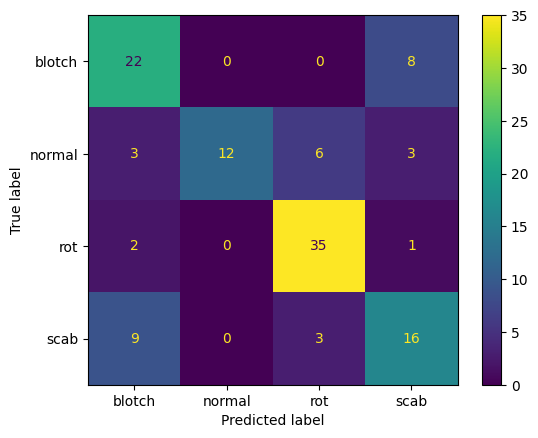 



Zowel mijn MobileNetV2 als ResNet50 model ook opnieuw getraind.
MobileNet:
Epoch 35/35
68/68 [==============================] - 117s 2s/step - loss: 0.0176 - accuracy: 0.9963 - val_loss: 0.1409 - val_accuracy: 0.9685
Test accuracy 0,80

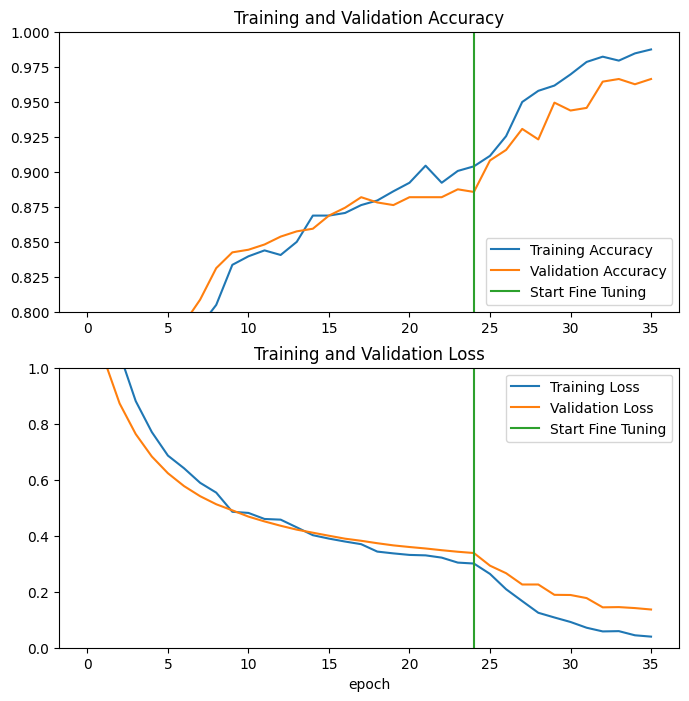

ResNet50:
Epoch 35/35
68/68 [==============================] - 247s 4s/step - loss: 1.0202 - accuracy: 0.5663 - val_loss: 0.9378 - val_accuracy: 0.5889
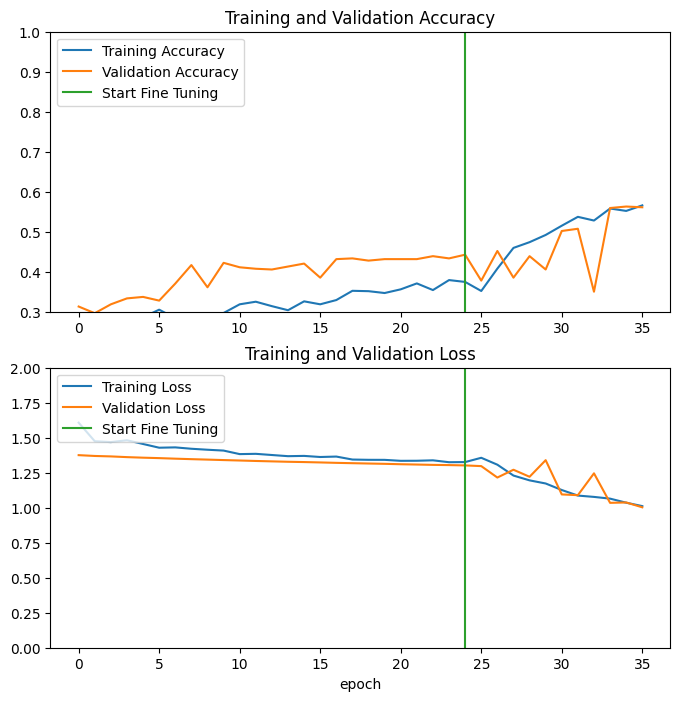



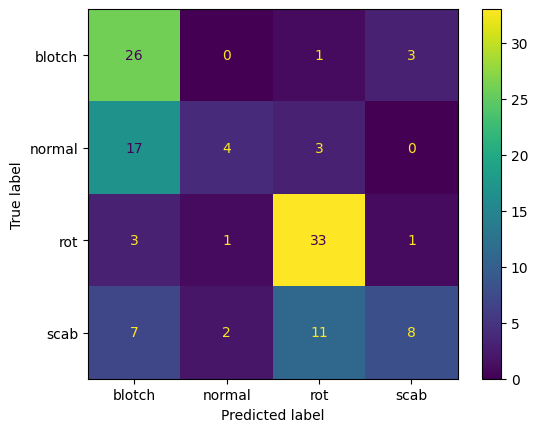

Niet erg tevreden over ResNet50 als pre-trained optie. Zoals in de plot te zien is is de leercurve erg schokkerig, en na 35 epochs is de loss nog relatief hoog en de accuracy relatief laag. In de confusionmatrix is ook te zien dat de prestaties van dit model niet heel erg om over naar huis te schrijven zijn. Finetunen zou verbetering kunnen geven, maar dit gaat erg veel tijd kosten.

Aangezien ik mij zou richten op de AQL tool (kevin heeft zich meer op het model gericht)aangegeven dat ik vast zat. De rest vd middag hebben we als groep overlegd of we dit gezamenlijk zouden kunnen oplossen.

Donderdag 10 & Vrijdag 11 november:

10 november (tijdens de KATA bij Ruud) vernomen dat een automatische batch-generator een 'Nice to Have' is voor het project, maar dat we vooralsnog met een hardcoded batch mogen werken. Besloten dat we dat voor nu zullen doen.

Maandag 14 november: 

Uitleg van Frank mbt de theorie achter NLP. Tevens uitleg encoder. Gezocht op SBert.net naar een geschikt model.
Aangezien ik als digibeet eea niet goed begreep Frank om verdere uitleg gevraagd welke hij heeft gegeven. Hierna zag ik direct de zin en de bedoeling en het eerste SBERT model aan de gang gekregen.

Dinsdag 15 november: 

Verder met chatbot research en uitproberen diverse modellen. Veel gekeken op HuggingFace.
Getracht om diverse SBert encoders te gebruiken met de door mij gewenste uitkomst.

we hebben deze dag de Agile Penny Game gedaan met medecursisten.

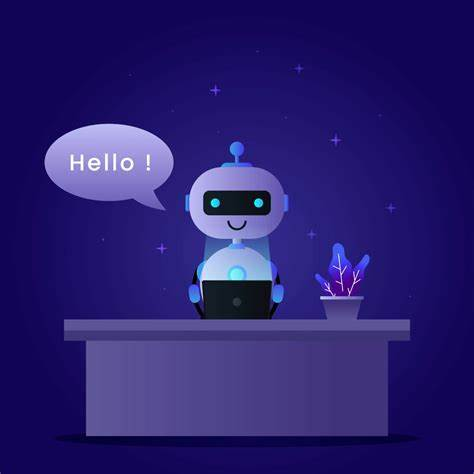

Woensdag 16 november: 

Met mijn gekozen SBert model (all-MiniLM-L12-v2, welke ik gekozen heb omdat deze met de hoogste waarschijnlijkheid steeds het juiste antwoord vond bij de gestelde vraag). Uiteindelijk, na veel moeite, voor elkaar gekregen dat ik als output alleen de hoogste score kreeg van de zin die het best matcht met de vraag (symantic search) en deze als antwoord word gegeven.

![imagessbert.jpg](attachment:imagessbert.jpg)

Donderdag 17 november: 

Les van Ruud. Eerste overleg over de presentatie van de eindopdracht op 25 november. Eerste opzet gemaakt van de verdeling van de onderwerpen. Verder deze dag vooral gebruikt om de koppeling tussen het Model, de AQL tool en NLP te maken. Dit is nogal een dingetje voor mij.

Vrijdag 18 november: 

Integratie van de modules daar draaide een groot gedeelte van dee dag om. We hebben nu een eigen CNN model, een pre-trained model, een AQL decisioner, en een chatbot. Uiteindelijk is het gelukt de ongelabelde data door ons model te halen.
Het model voorspelt de labels en via de AQL selector komt er een bepaalde qualiteit batch uit. De kwaliteit is op te vragen in de Chatbot. Kort gezegd is dit naar mijn idee de bedoeling. Wil het mijzelf ook niet moeilijker maken. Hier deze dag mee geexperimenteerd.
 
Aan Jeroen gevraagd of hij wilde kijken naar mijn model om de wat is goed en wat kan beter er op los te laten. Helaas is dat wederom niet gelukt.
Tevens iets verder gefinetuned wat we volgende week gaan presenteren: Marc gaat de cookiecutter behandelen. Kevin en ik de toehoorders in vogelvlucht willen meenemen in het project.

Maandag 21 november:

Vandaag, na mijn gesprek met Laura Frank gevraagd naar mijn model te kijken. Deze gaf aan dat het er prima uit zag en ik begreep dat zeker al het nootzakelijke er in zit. Wel most ik gebruik maken van een andere batchset, Use. Deze was mij niet opgevallen en staat naar mijn idee ook niet in de opdracht. Deze data kenmerkt zich door het ontbreken van labels. Dit is na een kleine aanpassing prima gelukt.

Dinsdag 22 November:

Vadaag heeft Jeroen tijd vrijgemaakt om te kijken naar wat ik tot zo ver heb. Ik had wederom wat datasets door elkaar gehaald.
Ook was er onduidelijkheid met welke modellen ik heb gebruikt voor de appelselectie. Dit heb ik uitgezocht en verduidelijkt.
Ook als team bezig geweest met de presentatie aanstaande vrijdag.

Woensdag 23 november:

Verdere invulling besproken voor vrijdag. Finetunen van het pretrained model en bezig met de text van dit document.